In [1]:
import os
os.getcwd()

'C:\\Users\\a\\git\\practical-statistics-for-data-scientists\\python\\notebooks'

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence


In [3]:
pip install pygam

In [4]:
from pygam import LinearGAM, s, l
from pygam.datasets import wage


import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [6]:
from dmba import stepwise_selection
from dmba import AIC_score

In [7]:
%matplotlib inline
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [8]:
LUNG_CSV = DATA / 'LungDisease.csv'
HOUSE_CSV = DATA / 'house_sales.csv'

In [9]:
lung=pd.read_csv(LUNG_CSV)
house=pd.read_csv(HOUSE_CSV)

In [10]:
predictors=['Exposure']
outcome='PEFR'
model=LinearRegression()
model.fit(lung[predictors], lung[outcome])
print('Intercept=',model.intercept_,'\nCoeficient Exposure=', model.coef_)

Intercept= 424.582806573957 
Coeficient Exposure= [-4.18457649]


<AxesSubplot:xlabel='Exposure', ylabel='PEFR'>

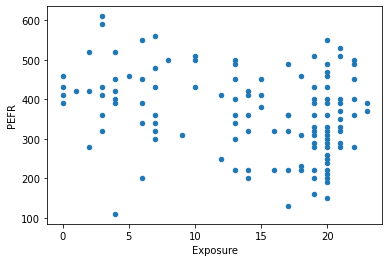

In [11]:
lung.plot.scatter(x='Exposure',y='PEFR')

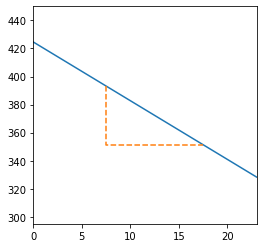

In [12]:
fig, ax=plt.subplots(figsize=(4,4))
ax.set_xlim(0, 23)
ax.set_ylim(295,450)
ax.plot((0,23),model.predict([[0],[23]]))


x=[[7.5],[17.5]]
y=model.predict(x)
ax.plot((7.5,7.5,17.5),(y[0],y[1],y[1]),'--')


In [13]:
fitted=model.predict(lung[predictors])
residuals=lung[outcome]-fitted


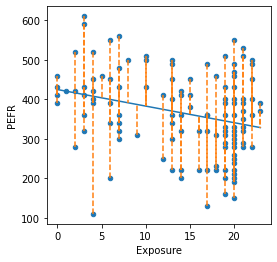

In [14]:
ax=lung.plot.scatter(x='Exposure',y='PEFR',figsize=(4,4))
ax.plot(lung.Exposure,fitted)
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted):
    ax.plot((x,x),(yactual,yfitted),'--',color='C1')

In [15]:
house = pd.read_csv(HOUSE_CSV, sep='\t')

In [16]:
predictors=['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
house_lm=LinearRegression()
house_lm.fit(house[predictors],house[outcome])
print ('Intercept=',house_lm.intercept_,'\nCoefficients=',)
for name, coef in zip(predictors, house_lm.coef_):
    print(name,':',coef)

Intercept= -521871.36818828445 
Coefficients=
SqFtTotLiving : 228.8306036024076
SqFtLot : -0.06046682065307258
Bathrooms : -19442.840398320994
Bedrooms : -47769.955185214334
BldgGrade : 106106.96307898096


In [17]:
fitted=house_lm.predict(house[predictors])
RMSE=np.sqrt(mean_squared_error(house[outcome], fitted))
r2=r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [18]:
model=sm.OLS(house[outcome], house[predictors].assign(const=1))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:08:42   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade',
              'PropertyType', 'NbrLivingUnits', 'SqFtFinBasement', 'YrBuilt',
              'YrRenovated', 'NewConstruction']
X=pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction']=[1 if nc else 0 for nc in X['NewConstruction']]
house_full=sm.OLS(house[outcome],X.assign(const=1))
results=house_full.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        11:25:09   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                198.6364      4.234     46.920      0.000     190.338     206.934
SqFtLot                        0.0771      0.058      1.330      0.184      -0.037       0.191
Bathrooms                   4.286e+04   3808.114     11.255      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.187e+04   2396.904    -21.638      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2441.242     56.228      0.000    1.32e+05    1.42e+05
NbrLivingUnits              5723.8438   1.76e+04      0.326      0.744   -2.87e+04    4.01e+04
SqFtFinBasement                7.0611      4.627      1.526      0.127      -2.009      16.131
YrBuilt                    -3574.2210     77.228    -46.282      0.000   -3725.593   -3422.849
YrRenovated                   -2.5311      3.924     -0.645      0.519     -10.222       5.160
NewConstruction            -2489.1122   5936.692     -0.419      0.675   -1.41e+04    9147.211
PropertyType_Single Family  2.997e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.286e+04    2.7e+04      3.438      0.001    3.99e+04    1.46e+05
const                       6.182e+06   1.55e+05     39.902      0.000    5.88e+06    6.49e+06
==============================================================================
Omnibus:                    31006.128   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26251977.078
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.984   Cond. No.                     2.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
y=house[outcome]

def train_model(variables):
    if len(variables)==0:
        return None
    model=LinearRegression()
    model.fit(X[variables],y)
    return model
    
def score_model(model, variables):
    if len(variables)==0:
        return AIC_score(y,[y.mean()]*len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]),model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, verbose= True)
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None
Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.27755304201617
 BldgGrade: 137159.56022619744
 YrBuilt: -3565.4249392494553
 Bedrooms: -51947.38367361353
 Bathrooms: 42396.16452772067
 PropertyType_Townhouse: 84479.16203300106
 SqFtFinBasement: 7.04697496757506
 PropertyType_Single Family: 22912.055187017686


In [32]:
house['Year']=[int(date.split('-')[0]) for date in house. DocumentDate]
house['weight']=house.Year -2005
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'
house_wt=LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.weight)
pd.DataFrame({
    'predictor': predictors,
    'house_lm' : house_lm.coef_,
    'house_wt' : house_wt.coef_,
}).append({
    'predictor' : 'intercept',
    'house_lm'  : house_lm.intercept_,
    'house_wt'  : house_wt.intercept_
}, ignore_index=True)

,predictor,house_lm,house_wt
0,SqFtTotLiving,228.830604,245.024089
1,SqFtLot,-0.060467,-0.292415
2,Bathrooms,-19442.840398,-26085.970109
3,Bedrooms,-47769.955185,-53608.876436
4,BldgGrade,106106.963079,115242.434726
5,intercept,-521871.368188,-584189.329446


In [33]:
1605687-(2*122467)

1360753